In [ ]:
#Se importan librerias y csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/Datos_Jugadores_2024-2025_ampliado.csv")
df

,Jugador,Nacionalidad,Posicion,Equipo,Competicion,Edad,Partidos jugados,Minutos jugados,Titularidades,Goles,...,Entradas,Tarjetas amarillas,Tarjetas rojas,Regates exitosos,% de regates exitosos,Pases completados,Distancia total,Intercepciones,Nac_Esperada,Es_autoctono
0,Max Aarons,eng ENG,"DF,MF",Valencia,La Liga,25.0,2,104,1,0,...,3,1,0,1,25.0,29,414,0,es ESP,False
1,Rodrigo Abajas,es ESP,DF,Valencia,La Liga,22.0,1,65,1,0,...,3,1,0,1,100.0,17,268,1,es ESP,True
2,James Abankwah,ie IRL,"DF,MF",Udinese,Serie A,21.0,6,88,0,0,...,4,1,0,0,NaN,36,614,1,it ITA,False
3,Keyliane Abdallah,fr FRA,FW,Marseille,Ligue 1,19.0,1,3,0,0,...,1,0,0,0,NaN,2,41,0,fr FRA,True
4,Yunis Abdelhamid,ma MAR,DF,Saint-Étienne,Ligue 1,37.0,15,988,11,0,...,17,2,0,3,42.9,438,7952,13,fr FRA,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,Martín Zubimendi,es ESP,MF,Real Sociedad,La Liga,26.0,33,2761,31,2,...,72,5,0,18,66.7,1371,23552,40,es ESP,True
2674,Edhy Zuliani,it ITA,DF,Toulouse,Ligue 1,20.0,1,9,0,0,...,0,0,0,0,NaN,2,22,1,fr FRA,False
2675,Szymon Żurkowski,pl POL,MF,Empoli,Serie A,27.0,5,106,0,0,...,6,0,0,2,50.0,27,338,1,it ITA,False
2676,Martin Ødegaard,no NOR,MF,Arsenal,Premier League,26.0,28,2220,25,2,...,19,4,0,23,41.1,1188,18445,5,eng ENG,False


In [ ]:
#Conteo de jugadores que ocupan mas de una posicion (Polifuncional)

df_multi_posicion = df[df['Posicion'].str.contains(',')]
conteo = df_multi_posicion.groupby(['Competicion', 'Es_autoctono']).size().reset_index(name='cantidad')

#separamos en columnas 

conteo_pivot = conteo.pivot(index='Competicion', columns='Es_autoctono', values='cantidad').fillna(0)
conteo_pivot.columns = ['Extranjeros', 'Autoctonos']  # False = extranjero, True = autóctono
conteo_pivot

,Extranjeros,Autoctonos
Competicion,,
Bundesliga,94,66
La Liga,59,102
Ligue 1,99,65
Premier League,87,46
Serie A,102,51


In [88]:

# Calcular % de Polifuncionalidad
conteo_pct = conteo_pivot.copy()

# Calcular porcentajes por fila (por competición)
conteo_pct['Total'] = conteo_pct.sum(axis=1)
conteo_pct['% Autoctonos'] = (conteo_pct['Autoctonos'] / conteo_pct['Total']) * 100
conteo_pct['% Extranjeros'] = (conteo_pct['Extranjeros'] / conteo_pct['Total']) * 100

conteo_porcentajes = conteo_pct[['Autoctonos', 'Extranjeros']].round(2)

# Mostrar
conteo_porcentajes

,Autoctonos,Extranjeros
Competicion,,
Bundesliga,66,94
La Liga,102,59
Ligue 1,65,99
Premier League,46,87
Serie A,51,102


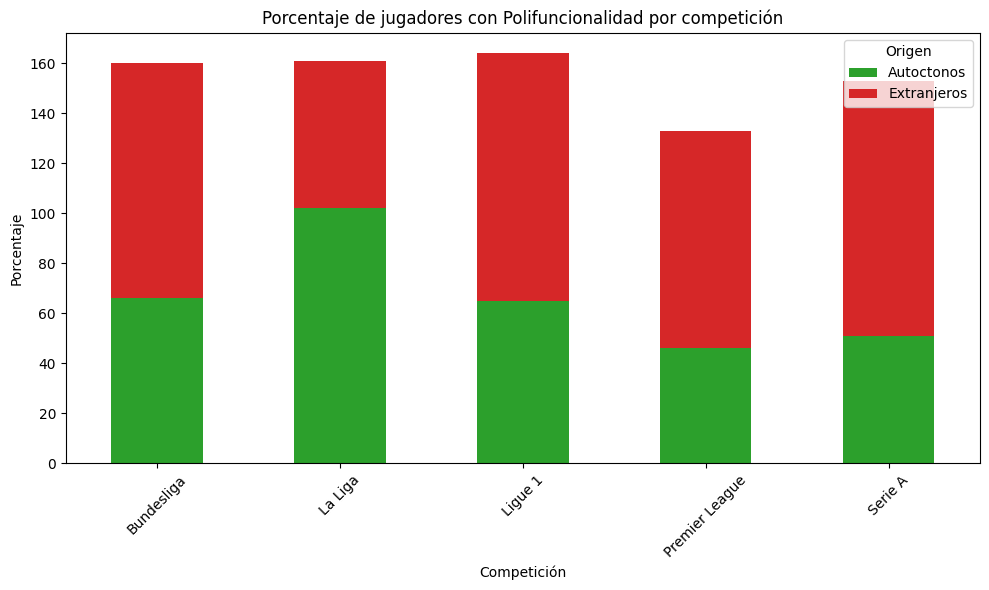

In [ ]:
#Grafico del % de Polifuncionalidad

conteo_porcentajes.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#2ca02c', '#d62728'])
plt.title('Porcentaje de jugadores con Polifuncionalidad por competición')
plt.ylabel('Porcentaje')
plt.xlabel('Competición')
plt.legend(title='Origen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [95]:
#Calcular que promediod e partidos jugados por tipo

partidos_por_tipo = df.groupby(['Competicion', 'Es_autoctono'])['Partidos jugados'].mean().reset_index()
partidos_por_tipo['Partidos jugados'] = partidos_por_tipo['Partidos jugados'].round(2)
partidos_por_tipo


,Competicion,Es_autoctono,Partidos jugados
0,Bundesliga,Autóctono,19.98
1,Bundesliga,Extranjero,18.45
2,La Liga,Autóctono,18.43
3,La Liga,Extranjero,19.52
4,Ligue 1,Autóctono,15.53
5,Ligue 1,Extranjero,17.46
6,Premier League,Autóctono,17.31
7,Premier League,Extranjero,21.74
8,Serie A,Autóctono,17.68
9,Serie A,Extranjero,18.81


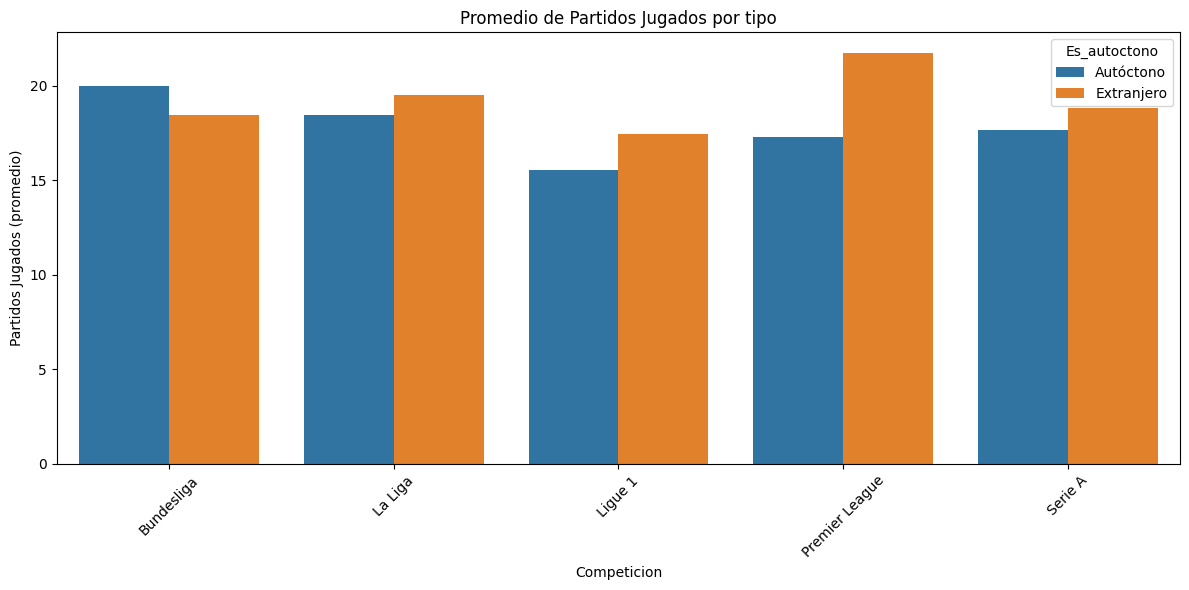

In [92]:
#Grafico de partidos jugados por tipo (en promedio)

plt.figure(figsize=(12, 6))
sns.barplot(data=partidos_por_tipo, x='Competicion', y='Partidos jugados', hue='Es_autoctono')
plt.title('Promedio de Partidos Jugados por tipo')
plt.ylabel('Partidos Jugados (promedio)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calcular la cantidad total de minutos jugados por tipo

minutos_totales = df.groupby(['Competicion', 'Es_autoctono'])['Minutos jugados'].sum().reset_index()

minutos_totales['Minutos jugados'] = minutos_totales['Minutos jugados'].round(2)

minutos_totales

,Competicion,Es_autoctono,Minutos jugados
0,Bundesliga,Autóctono,260911
1,Bundesliga,Extranjero,318776
2,La Liga,Autóctono,395468
3,La Liga,Extranjero,282037
4,Ligue 1,Autóctono,206238
5,Ligue 1,Extranjero,365155
6,Premier League,Autóctono,204780
7,Premier League,Extranjero,489164
8,Serie A,Autóctono,213224
9,Serie A,Extranjero,453224


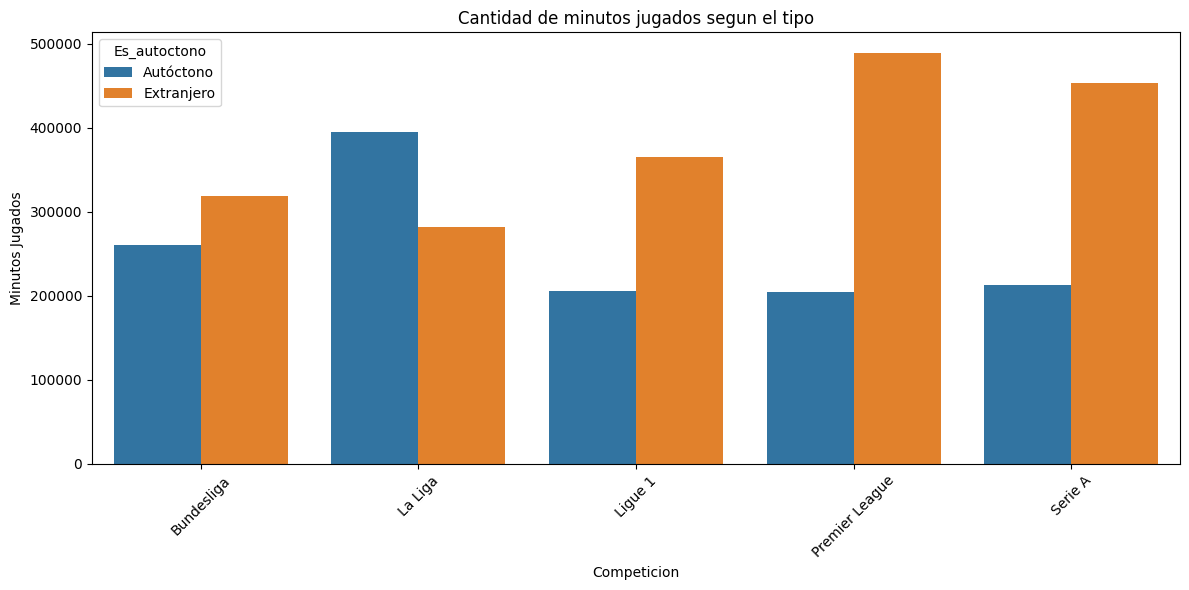

In [ ]:
# Gráfico de minutos jugados por tipo de jugador

plt.figure(figsize=(12, 6))
sns.barplot(data=minutos_totales, x='Competicion', y='Minutos jugados', hue='Es_autoctono')
plt.title('Cantidad de minutos jugados segun el tipo')
plt.ylabel('Minutos Jugados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calcular promedio de titularidades por tipo de jugador

titularidades_por_tipo = df.groupby(['Competicion', 'Es_autoctono'])['Titularidades'].mean().reset_index()
titularidades_por_tipo['Titularidades'] = titularidades_por_tipo['Titularidades'].round(2)

titularidades_por_tipo

,Competicion,Es_autoctono,Titularidades
0,Bundesliga,Autóctono,14.60
1,Bundesliga,Extranjero,12.72
2,La Liga,Autóctono,12.67
3,La Liga,Extranjero,14.29
4,Ligue 1,Autóctono,10.87
5,Ligue 1,Extranjero,12.60
6,Premier League,Autóctono,12.32
7,Premier League,Extranjero,16.00
8,Serie A,Autóctono,12.79
9,Serie A,Extranjero,13.09


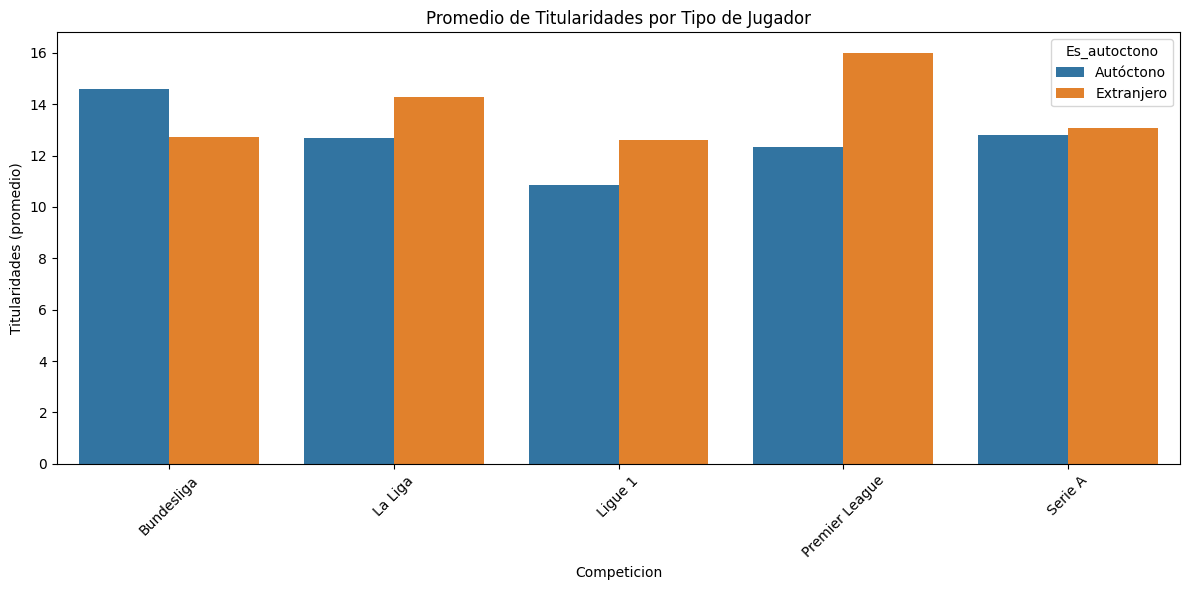

In [ ]:
#Grafico del promedio de titularidades segun tipo de jugador

plt.figure(figsize=(12, 6))
sns.barplot(data=titularidades_por_tipo, x='Competicion', y='Titularidades', hue='Es_autoctono')
plt.title('Promedio de Titularidades por Tipo de Jugador')
plt.ylabel('Titularidades (promedio)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [140]:
#Calcular el promedio de goles por partido que aportan los jugadores segun el tipo

goles_por_tipo = (df.groupby(['Competicion', 'Es_autoctono'])
    .apply(lambda x: (x['Goles'] / x['Partidos jugados']).mean(),include_groups=False)
    .reset_index(name='Goles_por_partido')
)
goles_por_tipo['Goles_por_partido'] = goles_por_tipo['Goles_por_partido'].round(2)

goles_por_tipo

,Competicion,Es_autoctono,Goles_por_partido
0,Bundesliga,Autóctono,0.07
1,Bundesliga,Extranjero,0.08
2,La Liga,Autóctono,0.05
3,La Liga,Extranjero,0.08
4,Ligue 1,Autóctono,0.06
5,Ligue 1,Extranjero,0.07
6,Premier League,Autóctono,0.06
7,Premier League,Extranjero,0.08
8,Serie A,Autóctono,0.05
9,Serie A,Extranjero,0.06


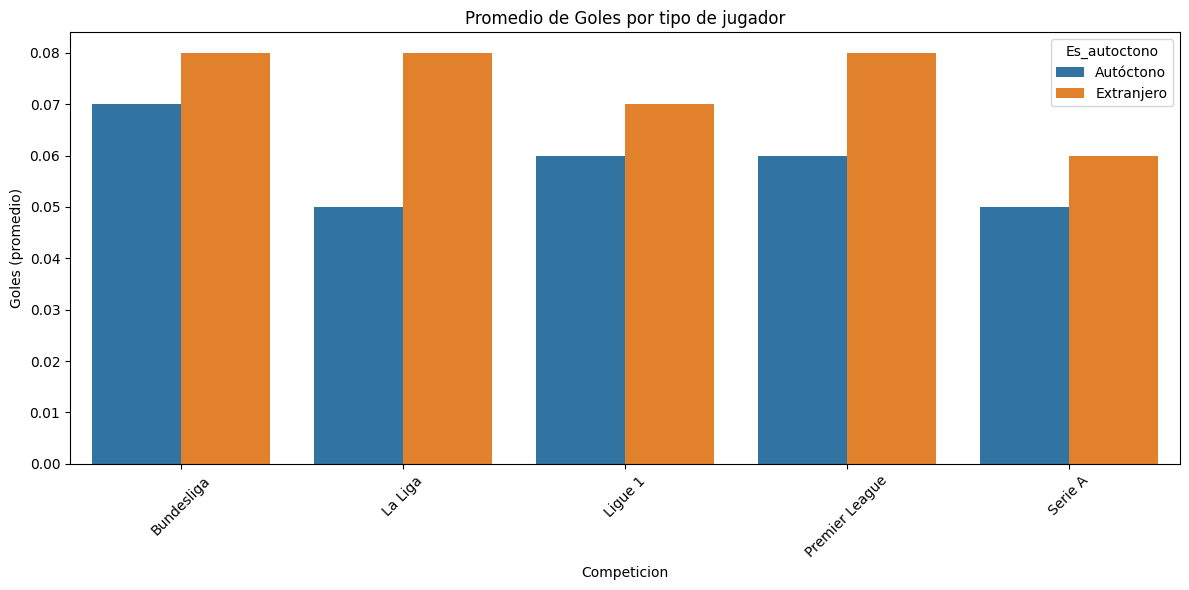

In [ ]:
# Gráfico del promedio de goles por tipo de jugador

plt.figure(figsize=(12, 6))
sns.barplot(data=goles_por_tipo, x='Competicion', y='Goles_por_partido', hue='Es_autoctono')
plt.title('Promedio de Goles por tipo de jugador')
plt.ylabel('Goles (promedio)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Calcular el promedio de asistencias por partido que aportan los jugadores segun el tipo

asistencias_por_tipo = (df.groupby(['Competicion', 'Es_autoctono'])
    .apply(lambda x: (x['Asistencias'] / x['Partidos jugados']).mean(),include_groups=False)
    .reset_index(name='Asistencias_por_partido')
)
asistencias_por_tipo['Asistencias_por_partido'] = asistencias_por_tipo['Asistencias_por_partido'].round(3)

asistencias_por_tipo

,Competicion,Es_autoctono,Asistencias_por_partido
0,Bundesliga,Autóctono,0.056
1,Bundesliga,Extranjero,0.057
2,La Liga,Autóctono,0.048
3,La Liga,Extranjero,0.045
4,Ligue 1,Autóctono,0.041
5,Ligue 1,Extranjero,0.051
6,Premier League,Autóctono,0.053
7,Premier League,Extranjero,0.052
8,Serie A,Autóctono,0.034
9,Serie A,Extranjero,0.046


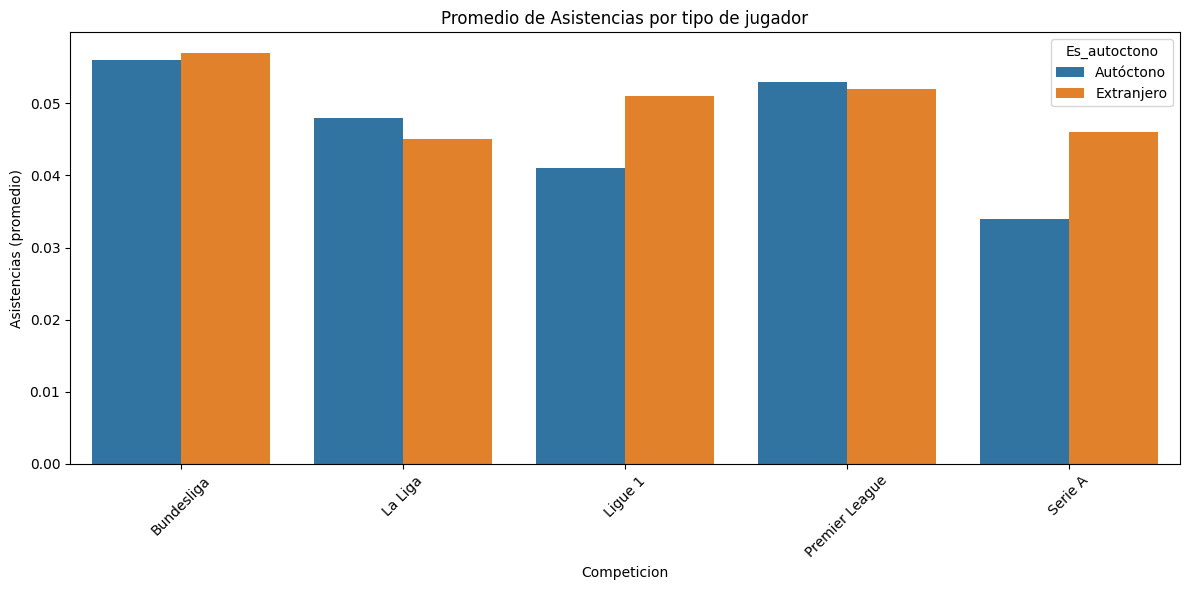

In [ ]:
# Gráfico de asistencias por tipo de jugador

plt.figure(figsize=(12, 6))
sns.barplot(data=asistencias_por_tipo, x='Competicion', y='Asistencias_por_partido', hue='Es_autoctono')
plt.title('Promedio de Asistencias por tipo de jugador')
plt.ylabel('Asistencias (promedio)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [138]:
#Calcular el promedio de entradas por partido que aportan los jugadores segun el tipo

entradas_por_tipo = (df.groupby(['Competicion', 'Es_autoctono'])
    .apply(lambda x: (x['Entradas'] / x['Partidos jugados']).mean(),include_groups=False)
    .reset_index(name='Entradas_por_partido')
)
entradas_por_tipo['Entradas_por_partido'] = entradas_por_tipo['Entradas_por_partido'].round(2)

entradas_por_tipo

,Competicion,Es_autoctono,Entradas_por_partido
0,Bundesliga,Autóctono,0.88
1,Bundesliga,Extranjero,0.85
2,La Liga,Autóctono,0.93
3,La Liga,Extranjero,0.90
4,Ligue 1,Autóctono,1.03
5,Ligue 1,Extranjero,0.99
6,Premier League,Autóctono,0.87
7,Premier League,Extranjero,1.07
8,Serie A,Autóctono,0.74
9,Serie A,Extranjero,0.89


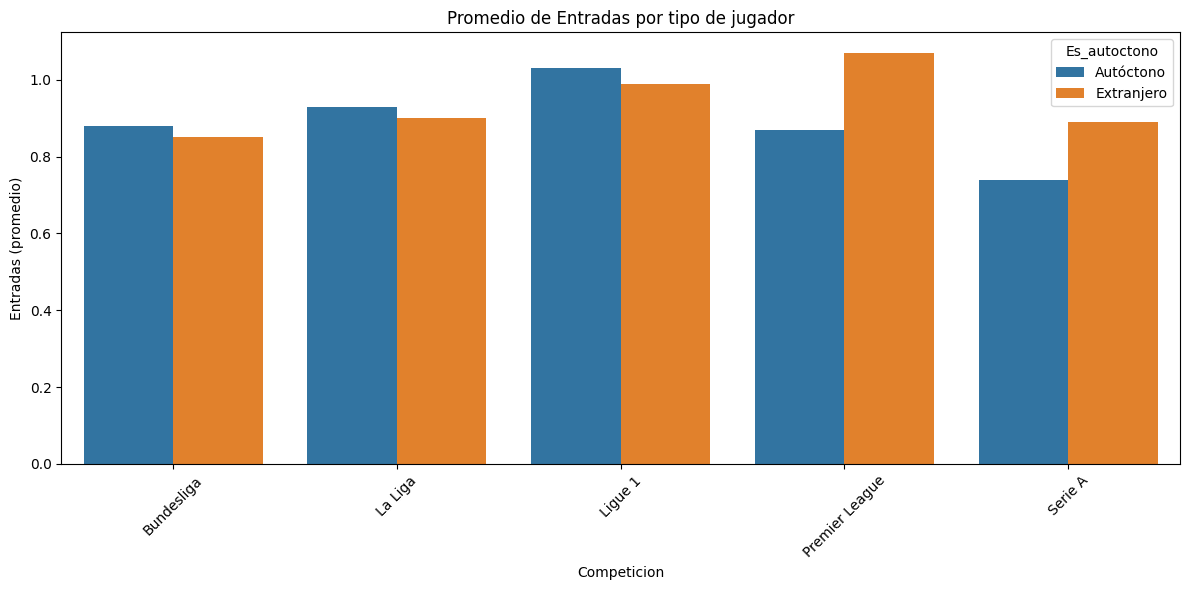

In [ ]:
# Gráfico de entradas por tipo de jugador

plt.figure(figsize=(12, 6))
sns.barplot(data= entradas_por_tipo, x='Competicion', y='Entradas_por_partido', hue='Es_autoctono')
plt.title('Promedio de Entradas por tipo de jugador')
plt.ylabel('Entradas (promedio)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Gráfico de tarjetas amarillas por tipo de jugador
amarillas_por_tipo = (df.groupby(['Competicion', 'Es_autoctono'])
    .apply(lambda x: (x['Tarjetas amarillas'] / x['Partidos jugados']).mean(),include_groups=False)
    .reset_index(name='Amarillas_por_partido')
)
amarillas_por_tipo['Amarillas_por_partido'] = amarillas_por_tipo['Amarillas_por_partido'].round(2)

amarillas_por_tipo

,Competicion,Es_autoctono,Amarillas_por_partido
0,Bundesliga,Autóctono,0.12
1,Bundesliga,Extranjero,0.13
2,La Liga,Autóctono,0.13
3,La Liga,Extranjero,0.15
4,Ligue 1,Autóctono,0.10
5,Ligue 1,Extranjero,0.12
6,Premier League,Autóctono,0.12
7,Premier League,Extranjero,0.12
8,Serie A,Autóctono,0.10
9,Serie A,Extranjero,0.11


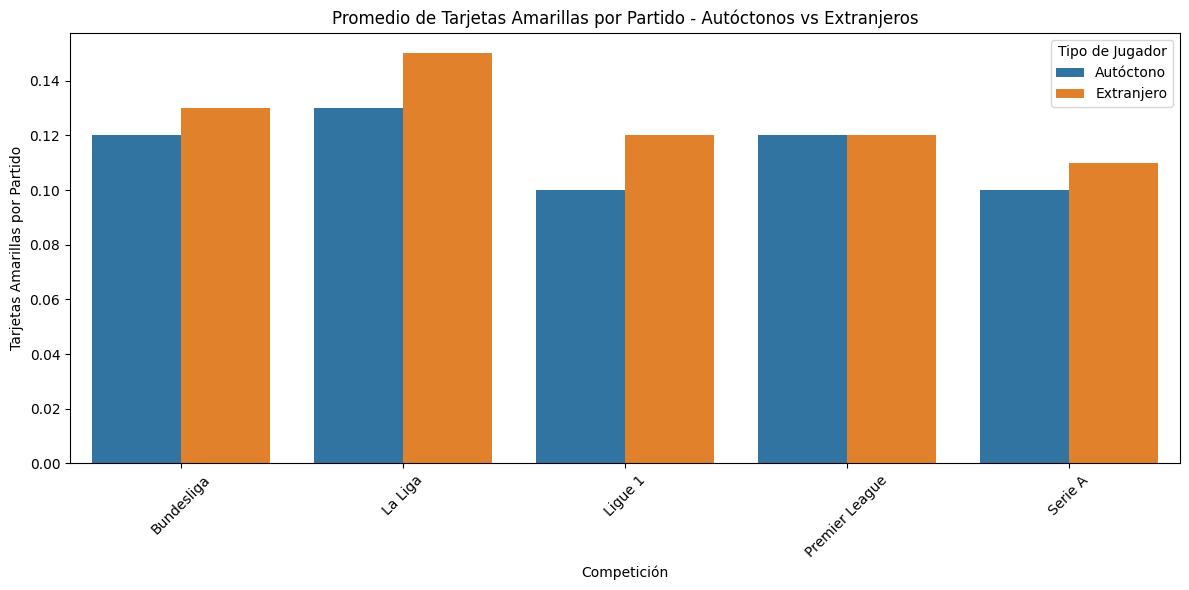

In [ ]:
# Gráfico de tarjetas amarillas por tipo de jugador

plt.figure(figsize=(12, 6))
sns.barplot(data=amarillas_por_tipo, x='Competicion', y='Amarillas_por_partido', hue='Es_autoctono')
plt.title('Promedio de Tarjetas Amarillas por Partido - Autóctonos vs Extranjeros')
plt.xlabel('Competición')
plt.ylabel('Tarjetas Amarillas por Partido')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Jugador')
plt.tight_layout()
plt.show()

In [ ]:
# Calcular promedio de tarjetas rojas por tipo de jugador

promedio_rojas = (df.groupby(['Competicion', 'Es_autoctono'])['Tarjetas rojas']
    .mean()
    .reset_index(name='Tarjetas_rojas')
)
promedio_rojas['Tarjetas_rojas'] = promedio_rojas['Tarjetas_rojas'].round(2)

promedio_rojas

,Competicion,Es_autoctono,Tarjetas_rojas
0,Bundesliga,Autóctono,0.12
1,Bundesliga,Extranjero,0.10
2,La Liga,Autóctono,0.11
3,La Liga,Extranjero,0.16
4,Ligue 1,Autóctono,0.09
5,Ligue 1,Extranjero,0.13
6,Premier League,Autóctono,0.10
7,Premier League,Extranjero,0.08
8,Serie A,Autóctono,0.09
9,Serie A,Extranjero,0.12


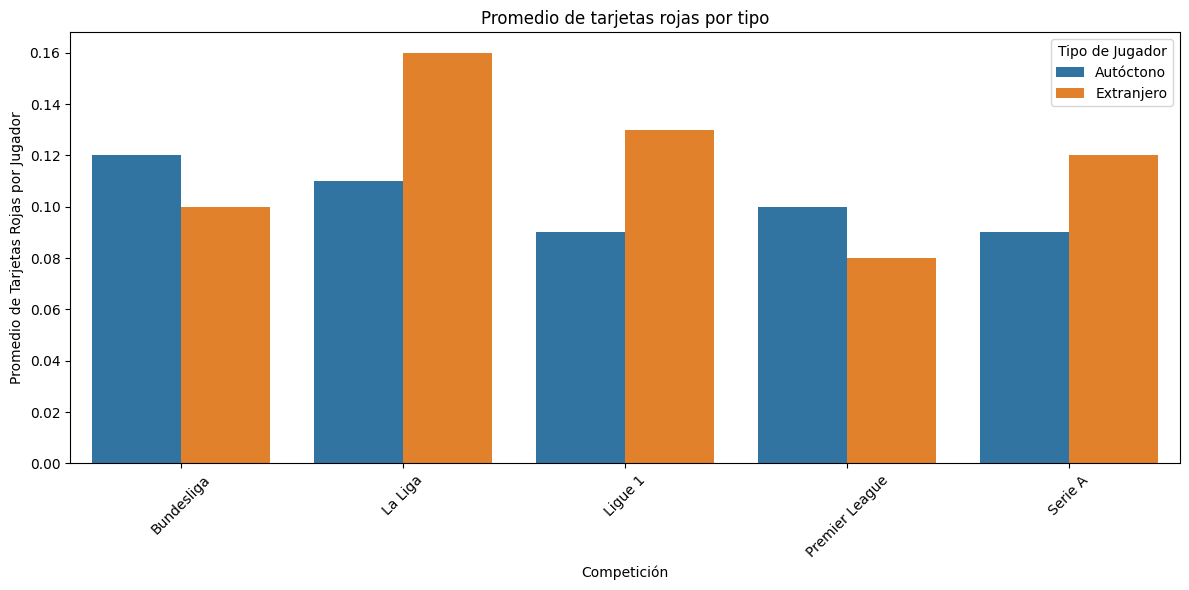

In [ ]:
# Gráfico de tarjetas rojas por tipo de jugador

plt.figure(figsize=(12, 6))
sns.barplot(data=promedio_rojas, x='Competicion', y='Tarjetas_rojas', hue='Es_autoctono')
plt.title('Promedio de tarjetas rojas por tipo')
plt.xlabel('Competición')
plt.ylabel('Promedio de Tarjetas Rojas por Jugador')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Jugador')
plt.tight_layout()
plt.show()

In [ ]:
# Calculo de regates exitosos por tipo de jugador

regates_por_tipo = (df.groupby(['Competicion', 'Es_autoctono'])
    .apply(lambda x: (x['Regates exitosos'] / x['Partidos jugados']).mean(),include_groups=False)
    .reset_index(name='Regates_exitosos_por_partido')
)
regates_por_tipo['Regates_exitosos_por_partido'] = regates_por_tipo['Regates_exitosos_por_partido'].round(2)

regates_por_tipo

,Competicion,Es_autoctono,Regates_exitosos_por_partido
0,Bundesliga,Autóctono,0.34
1,Bundesliga,Extranjero,0.40
2,La Liga,Autóctono,0.38
3,La Liga,Extranjero,0.43
4,Ligue 1,Autóctono,0.39
5,Ligue 1,Extranjero,0.41
6,Premier League,Autóctono,0.37
7,Premier League,Extranjero,0.44
8,Serie A,Autóctono,0.26
9,Serie A,Extranjero,0.36


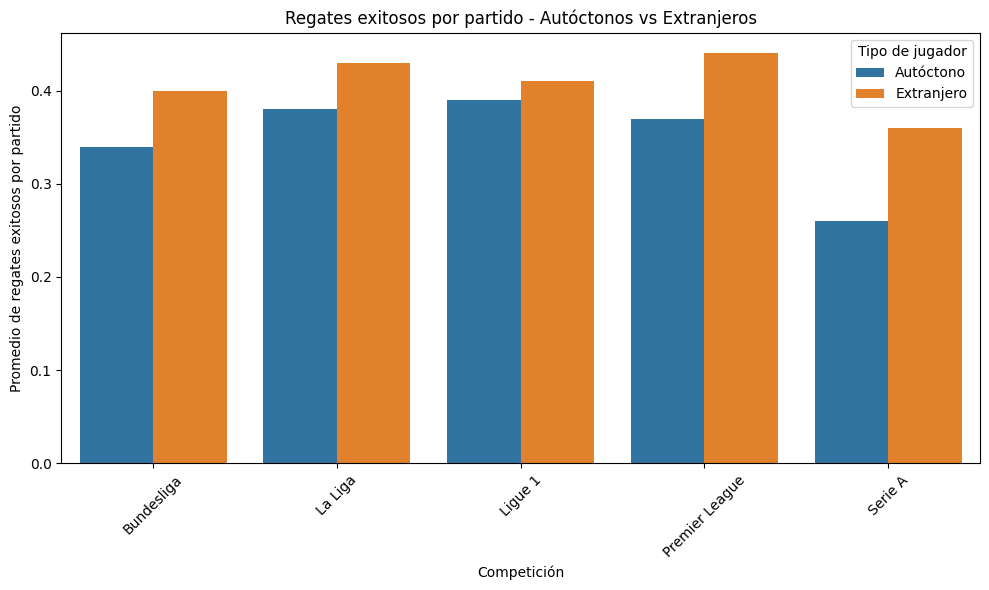

In [119]:
# Gráfico de regates exitosos por tipo de jugador
plt.figure(figsize=(10, 6))
sns.barplot(data=regates_por_tipo, x='Competicion', y='Regates_exitosos_por_partido', hue='Es_autoctono')
plt.title('Regates exitosos por partido - Autóctonos vs Extranjeros')
plt.ylabel('Promedio de regates exitosos por partido')
plt.xlabel('Competición')
plt.xticks(rotation=45)
plt.legend(title='Tipo de jugador')
plt.tight_layout()
plt.show()

In [ ]:
# Calculo de pases completados por tipo de jugador

pases_por_tipo = df.groupby(['Competicion', 'Es_autoctono'])\
    .apply(lambda x: (x['Pases completados'] / x['Partidos jugados']).mean(),include_groups=False)\
    .reset_index(name='Pases_completados_por_partido')
pases_por_tipo['Pases_completados_por_partido'] = pases_por_tipo['Pases_completados_por_partido'].round(2)

pases_por_tipo

,Competicion,Es_autoctono,Pases_completados_por_partido
0,Bundesliga,Autóctono,24.17
1,Bundesliga,Extranjero,21.81
2,La Liga,Autóctono,20.97
3,La Liga,Extranjero,22.30
4,Ligue 1,Autóctono,20.32
5,Ligue 1,Extranjero,23.56
6,Premier League,Autóctono,21.14
7,Premier League,Extranjero,23.84
8,Serie A,Autóctono,19.73
9,Serie A,Extranjero,22.05


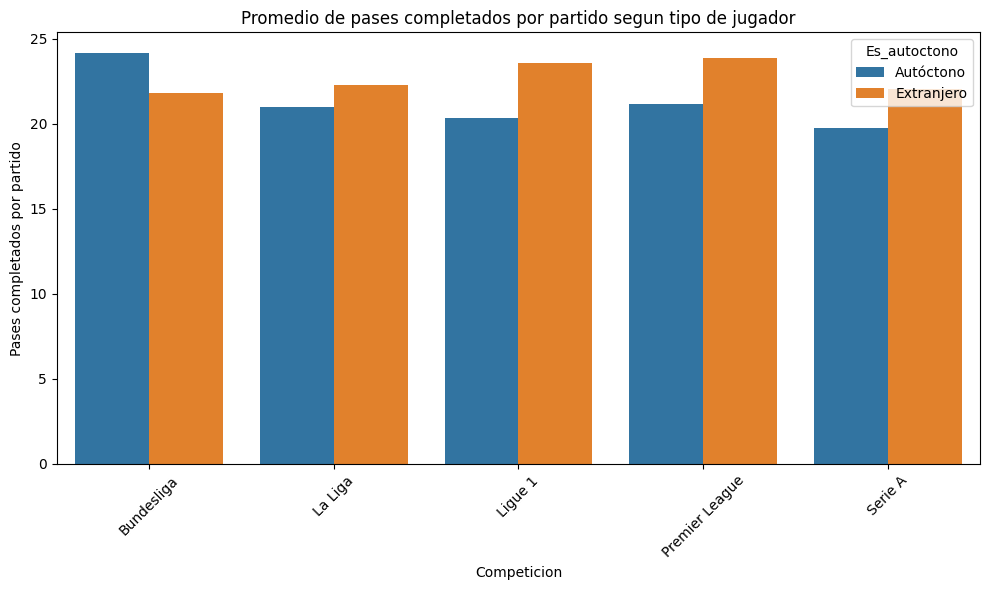

In [ ]:
# Grafico de pases completados por tipo de jugador

plt.figure(figsize=(10,6))
sns.barplot(data=pases_por_tipo, x='Competicion', y='Pases_completados_por_partido', hue='Es_autoctono')
plt.title('Promedio de pases completados por partido segun tipo de jugador')
plt.ylabel('Pases completados por partido')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Calculo de intercepciones por partido y por tipo de jugador

intercepciones_por_tipo = df.groupby(['Competicion', 'Es_autoctono'])\
    .apply(lambda x: (x['Intercepciones'] / x['Partidos jugados']).mean(),include_groups=False)\
    .reset_index(name='Intercepciones_por_partido')

intercepciones_por_tipo['Intercepciones_por_partido'] = intercepciones_por_tipo['Intercepciones_por_partido'].round(2)

intercepciones_por_tipo

,Competicion,Es_autoctono,Intercepciones_por_partido
0,Bundesliga,Autóctono,0.47
1,Bundesliga,Extranjero,0.50
2,La Liga,Autóctono,0.45
3,La Liga,Extranjero,0.44
4,Ligue 1,Autóctono,0.48
5,Ligue 1,Extranjero,0.53
6,Premier League,Autóctono,0.41
7,Premier League,Extranjero,0.48
8,Serie A,Autóctono,0.37
9,Serie A,Extranjero,0.43


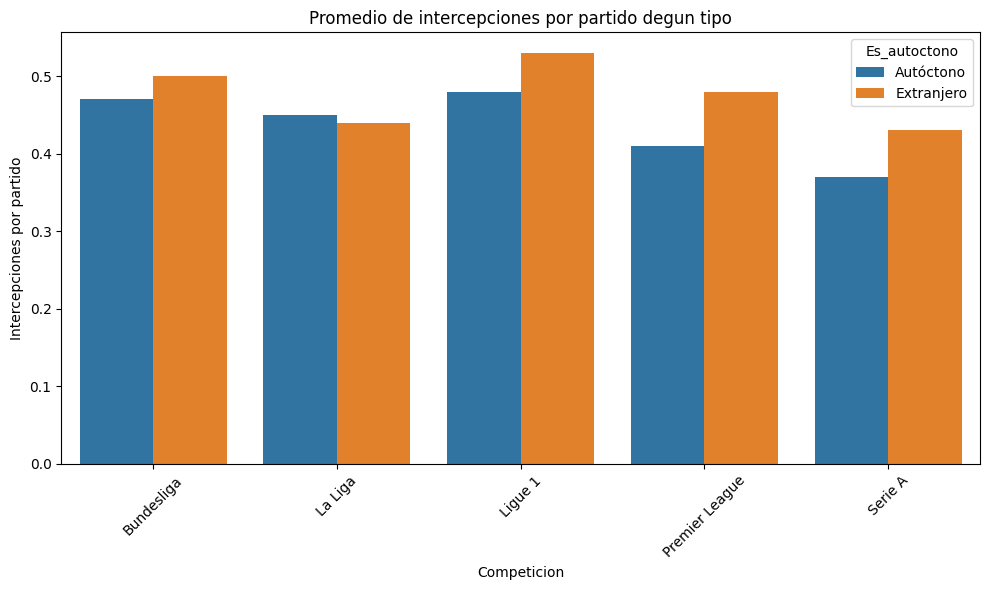

In [125]:
#Grafico de intercepciones completadas por partido y por tipo de jugador

plt.figure(figsize=(10,6))
sns.barplot(data=intercepciones_por_tipo, x='Competicion', y='Intercepciones_por_partido', hue='Es_autoctono')
plt.title('Promedio de intercepciones por partido degun tipo')
plt.ylabel('Intercepciones por partido')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Calculo de penales atajados segun tipo de jugador

penales_atajados_por_tipo = df.groupby(['Competicion', 'Es_autoctono'])['Penales atajados'].mean().reset_index()
penales_atajados_por_tipo['Penales atajados'] = penales_atajados_por_tipo['Penales atajados'].round(2)

penales_atajados_por_tipo

,Competicion,Es_autoctono,Penales atajados
0,Bundesliga,Autóctono,0.48
1,Bundesliga,Extranjero,0.85
2,La Liga,Autóctono,0.29
3,La Liga,Extranjero,0.60
4,Ligue 1,Autóctono,0.54
5,Ligue 1,Extranjero,0.38
6,Premier League,Autóctono,0.46
7,Premier League,Extranjero,0.23
8,Serie A,Autóctono,0.38
9,Serie A,Extranjero,0.50


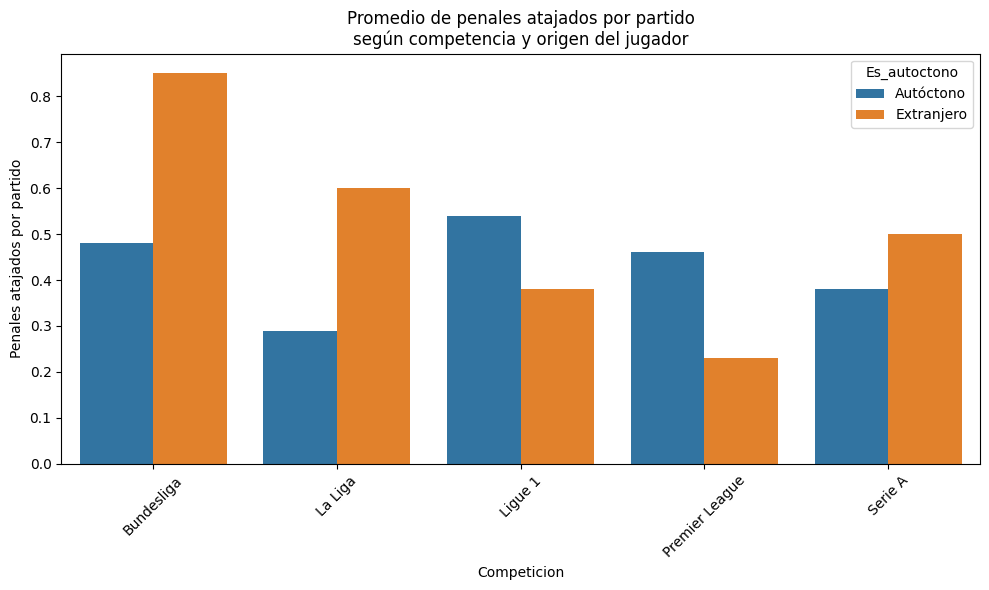

In [ ]:
#Grafico de penales atajados por tipo de jugador

plt.figure(figsize=(10,6))
sns.barplot(data=penales_atajados_por_tipo, x='Competicion', y='Penales atajados', hue='Es_autoctono')
plt.title('Promedio de penales atajados por partido\nsegún competencia y origen del jugador')
plt.ylabel('Penales atajados por partido')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Calculo de penales ejecutados segun tipo de jugador

penales_ejecutados_por_tipo = df.groupby(['Competicion', 'Es_autoctono'])['Penales ejecutados'].mean().reset_index()
penales_ejecutados_por_tipo['Penales ejecutados'] = penales_ejecutados_por_tipo['Penales ejecutados'].round(2)
penales_ejecutados_por_tipo

,Competicion,Es_autoctono,Penales ejecutados
0,Bundesliga,Autóctono,0.16
1,Bundesliga,Extranjero,0.17
2,La Liga,Autóctono,0.18
3,La Liga,Extranjero,0.27
4,Ligue 1,Autóctono,0.16
5,Ligue 1,Extranjero,0.21
6,Premier League,Autóctono,0.11
7,Premier League,Extranjero,0.16
8,Serie A,Autóctono,0.13
9,Serie A,Extranjero,0.19


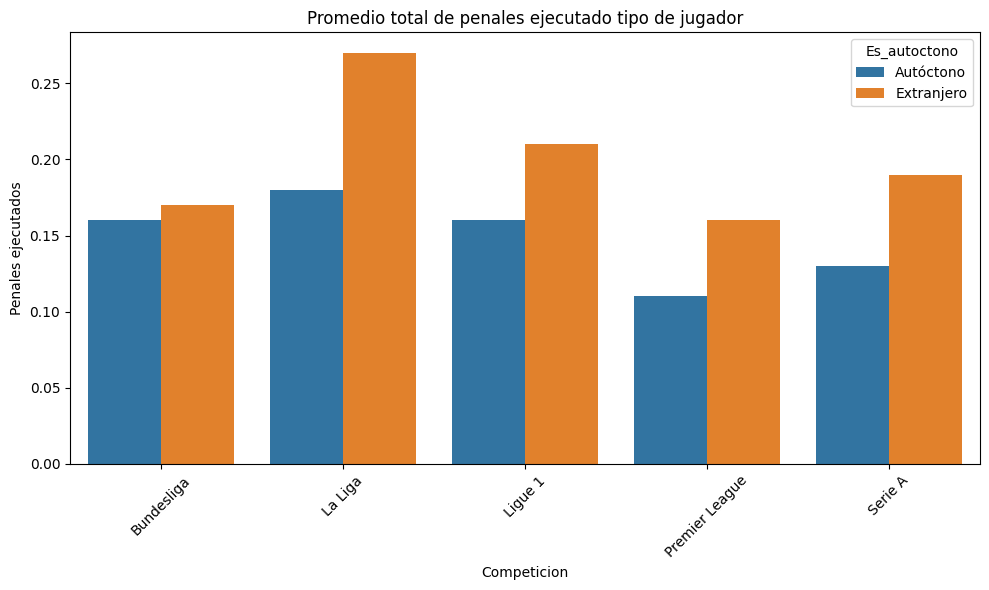

In [126]:
#Grafico de penales ejecutados por tipo de jugador

plt.figure(figsize=(10,6))
sns.barplot(data=penales_ejecutados_por_tipo,x='Competicion',y='Penales ejecutados',hue='Es_autoctono')
plt.title('Promedio total de penales ejecutado tipo de jugador')
plt.ylabel('Penales ejecutados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Calculo de penales convertidos segun tipo de jugador

penales_convertidos_por_tipo = df.groupby(['Competicion', 'Es_autoctono'])['Penales convertidos'].mean().reset_index()
penales_convertidos_por_tipo['Penales convertidos'] = penales_convertidos_por_tipo['Penales convertidos'].round(2)
penales_convertidos_por_tipo

,Competicion,Es_autoctono,Penales convertidos
0,Bundesliga,Autóctono,0.10
1,Bundesliga,Extranjero,0.12
2,La Liga,Autóctono,0.14
3,La Liga,Extranjero,0.23
4,Ligue 1,Autóctono,0.12
5,Ligue 1,Extranjero,0.18
6,Premier League,Autóctono,0.08
7,Premier League,Extranjero,0.14
8,Serie A,Autóctono,0.11
9,Serie A,Extranjero,0.14


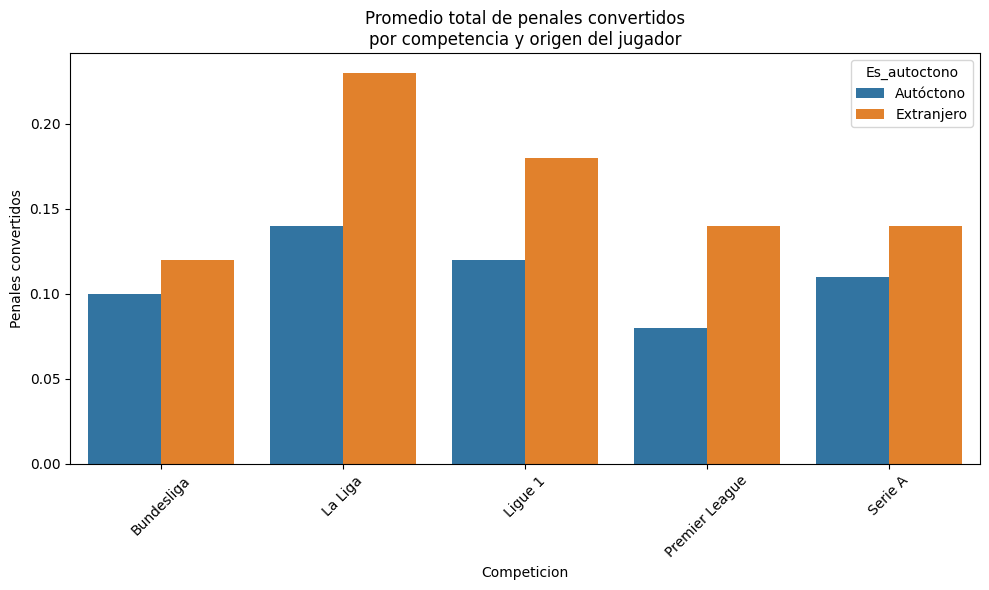

In [ ]:
#Grafico de penales convertidos por tipo de jugador

plt.figure(figsize=(10,6))
sns.barplot(data=penales_convertidos_por_tipo,x='Competicion',y='Penales convertidos',hue='Es_autoctono')
plt.title('Promedio total de penales convertidos por tipo jugador')
plt.ylabel('Penales convertidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()